# Simulation of 3D Double Pendulum Model 

<br> **Idea**: Implementing an ordinary differential equation with the help of Lagrangian Mechanics for solving the 3 dimensional pendulum model. In a 3D double pendulum model, we have 4 angles variables that we had to solved, which consist of 4 different angles, where in a 2 dimensional double pendulum, we only have 2 angles. 
<br>
<br> *Credits to: Luke Polson (https://github.com/lukepolson) for the concepts and implementation ideas.*

In [1]:
import sympy as smp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Defining Parameters
<br> The parameters for a double pendulum model consist of gravitation constant g, mass  of 2 pendulums, lenth of each pendulums, and time

In [2]:
t, g=smp.symbols('t g')
m1, m2=smp.symbols('m1 m2')
L1, L2=smp.symbols('L1 L2')

### Defining Functions 
<br> Angles: *Theta1*,*Theta2*, *Phi1*, *Phi2*  in respect of time

In [4]:
the1, the2, phi1, phi2 = smp.symbols(r'\theta_1, \theta_2 \phi_1 \phi_2', cls=smp.Function)

In [5]:
the1 = the1(t)
the2 = the2(t)
phi1 = phi1(t)
phi2 = phi2(t)

### Defining Derivatives
<br> Defining **first** and **second** derivatives in respect of time. 

In [7]:
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
phi1_d = smp.diff(phi1, t)
phi2_d = smp.diff(phi2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)
phi1_dd = smp.diff(phi1_d, t)
phi2_dd = smp.diff(phi2_d, t)

### Defining Coordinates X,Y,Z 
<br> Using **Spherical Coordinate System** for 3 dimensional double pendulum model. 

In [9]:
x1 = L1*smp.sin(the1)*smp.cos(phi1)
y1 = L1*smp.sin(the1)*smp.sin(phi1)
z1 = -L1*smp.cos(the1)
x2 = x1 + L2*smp.sin(the2)*smp.cos(phi2)
y2 = y1 + L2*smp.sin(the2)*smp.sin(phi2)
z2 = z1 - L2*smp.cos(the2)

In [10]:
smp.diff(x1, t)

-L1*sin(\phi_1(t))*sin(\theta_1(t))*Derivative(\phi_1(t), t) + L1*cos(\phi_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)

### Create Numerical Functions 
<br> Numerical Functions for each positions **x1, x2, z1, y1, y2, z2** 

In [12]:
x1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), x1)
y1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), y1)
z1_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), z1)
x2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), x2)
y2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), y2)
z2_f = smp.lambdify((the1, the2, phi1, phi2, L1, L2), z2)

In [13]:
x1_f(np.pi/2,0,np.pi/4,0,5,0)

3.5355339059327378

### Lagrangian Mechanics
<br> Solving the 3 dimensional double pendulum problem with the help of Lagrangian functional. 
<br>
<br> **Concept:** The Lagrangian Function is define as the difference of the total kinetic energy from the total potential energy.

In [15]:
T1 = smp.Rational(1,2) * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2 + smp.diff(z1, t)**2)
T2 = smp.Rational(1,2) * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2 + smp.diff(z2, t)**2)
T = T1 + T2
#Potential V 
V1 = m1*g*z1
V2 = m2*g*z2
V = V1 + V2 
# Lagrangian 
L = T - V

In [16]:
L

L1*g*m1*cos(\theta_1(t)) - g*m2*(-L1*cos(\theta_1(t)) - L2*cos(\theta_2(t))) + m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + (-L1*sin(\phi_1(t))*sin(\theta_1(t))*Derivative(\phi_1(t), t) + L1*cos(\phi_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t))**2 + (L1*sin(\phi_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L1*sin(\theta_1(t))*cos(\phi_1(t))*Derivative(\phi_1(t), t))**2)/2 + m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (-L1*sin(\phi_1(t))*sin(\theta_1(t))*Derivative(\phi_1(t), t) + L1*cos(\phi_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) - L2*sin(\phi_2(t))*sin(\theta_2(t))*Derivative(\phi_2(t), t) + L2*cos(\phi_2(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t))**2 + (L1*sin(\phi_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L1*sin(\theta_1(t))*cos(\phi_1(t))*Derivative(\phi_1(t), t) + L2*sin(\phi_2(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t) + L2*sin(\theta_2(t))*cos(\phi_2(t))*De

In [17]:
smp.diff(L,the1)

-L1*g*m1*sin(\theta_1(t)) - L1*g*m2*sin(\theta_1(t)) + m1*(2*L1**2*sin(\theta_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2 + (-L1*sin(\phi_1(t))*sin(\theta_1(t))*Derivative(\phi_1(t), t) + L1*cos(\phi_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t))*(-2*L1*sin(\phi_1(t))*cos(\theta_1(t))*Derivative(\phi_1(t), t) - 2*L1*sin(\theta_1(t))*cos(\phi_1(t))*Derivative(\theta_1(t), t)) + (-2*L1*sin(\phi_1(t))*sin(\theta_1(t))*Derivative(\theta_1(t), t) + 2*L1*cos(\phi_1(t))*cos(\theta_1(t))*Derivative(\phi_1(t), t))*(L1*sin(\phi_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L1*sin(\theta_1(t))*cos(\phi_1(t))*Derivative(\phi_1(t), t)))/2 + m2*(2*L1*(L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) + L2*sin(\theta_2(t))*Derivative(\theta_2(t), t))*cos(\theta_1(t))*Derivative(\theta_1(t), t) + (-2*L1*sin(\phi_1(t))*sin(\theta_1(t))*Derivative(\theta_1(t), t) + 2*L1*cos(\phi_1(t))*cos(\theta_1(t))*Derivative(\phi_1(t), t))*(L1*sin(\phi_1(t))*cos(\theta_1(t))*Derivative(\theta_1(t), t

### Euler-Lagrange Equations 
<br> We have four variable (time-varying constraints).

In [19]:
# LE : Lagrange Equation
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify()
LE3 = smp.diff(L, phi1) - smp.diff(smp.diff(L, phi1_d), t).simplify()
LE4 = smp.diff(L, phi2) - smp.diff(smp.diff(L, phi2_d), t).simplify()

In [20]:
LE1

-L1*g*m1*sin(\theta_1(t)) - L1*g*m2*sin(\theta_1(t)) - L1*(L1*m1*Derivative(\theta_1(t), (t, 2)) + L1*m2*Derivative(\theta_1(t), (t, 2)) - L2*m2*sin(\phi_1(t) - \phi_2(t))*sin(\theta_1(t))*sin(\theta_2(t))*Derivative(\phi_2(t), t)*Derivative(\theta_1(t), t) + L2*m2*sin(\phi_1(t) - \phi_2(t))*sin(\theta_2(t))*cos(\theta_1(t))*Derivative(\phi_2(t), (t, 2)) - L2*m2*sin(\phi_1(t) - \phi_2(t))*cos(\theta_1(t))*cos(\theta_2(t))*Derivative(\phi_1(t), t)*Derivative(\theta_2(t), t) + 2*L2*m2*sin(\phi_1(t) - \phi_2(t))*cos(\theta_1(t))*cos(\theta_2(t))*Derivative(\phi_2(t), t)*Derivative(\theta_2(t), t) + L2*m2*sin(\theta_1(t))*sin(\theta_2(t))*Derivative(\theta_2(t), (t, 2)) - L2*m2*sin(\theta_1(t))*cos(\phi_1(t) - \phi_2(t))*cos(\theta_2(t))*Derivative(\theta_1(t), t)*Derivative(\theta_2(t), t) + L2*m2*sin(\theta_1(t))*cos(\theta_2(t))*Derivative(\theta_2(t), t)**2 + L2*m2*sin(\theta_2(t))*cos(\phi_1(t) - \phi_2(t))*cos(\theta_1(t))*Derivative(\phi_1(t), t)*Derivative(\phi_2(t), t) - L2*m2*sin

In [21]:
#Solving Lagranges equations 

solve = smp.solve([LE1, LE2, LE3, LE4], (the1_dd, the2_dd, phi1_dd, phi2_dd), simplify=False, rational=False)

<br> Now we have **4 second order ODE**. Python can only solve system of 1st order ODE. 

<br> **The Solution** to this is to to get *a system of 8 first oder ODE* by setting up new variable which correspond to the second derivative. Through this Method we are able to solve first order ODE problem for 8 unknowns. 

<br> o1 = d(theta1)/dt
<br> o2 = d(theta2)/dt
<br> w1 = d(phi1)/dt
<br> w2 = d(phi2)/dt 

In [23]:
do1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), solve[the1_dd])
do2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), solve[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

dw1dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), solve[phi1_dd])
dw2dt_f = smp.lambdify((t,g,m1,m2,L1,L2,the1,the2,the1_d,the2_d,phi1,phi2,phi1_d,phi2_d), solve[phi2_dd])
dphi1dt_f = smp.lambdify(phi1_d, phi1_d)
dphi2dt_f = smp.lambdify(phi2_d, phi2_d)

<br> Now define **vector S** for all variable that we want to solve. 
<br> In Python, we need to write a function that takes in S and *t* and returns dS/dt, where dS/dt is a function of "S" and "t".

In [25]:
def dSdt(S, t, g, m1, m2, L1, L2):
    the1, the2, phi1, phi2, o1, o2, w1, w2 = S
    return [
        dthe1dt_f(o1),
        dthe2dt_f(o2),
        dphi1dt_f(w1),
        dphi2dt_f(w2),
        do1dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        do2dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        dw1dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
        dw2dt_f(t, g, m1, m2, L1, L2, the1, the2, o1, o2, phi1, phi2, w1, w2),
    ]

### Solving the First Order Differential Equation (ODE)

<br> We can use **Scipy.odeint** to solve our ODEs.
<br> Specified Parameters:
<br> -- g = 9.81 m/s^2
<br> -- m1 = 2 Kg
<br> -- m2 = 1 Kg
<br> -- L1 = 2 m
<br> -- L2 = 1 m
<br> Initial Conditions:
<br> -- Theta1(0) = pi/3
<br> -- Theta2(0) = pi/3
<br> -- Phi1(0) = 0
<br> -- Phi2(0) = -pi
<br> -- o1(0) = 3
<br> -- o2(0) = 10
<br> -- w1(0) = -2
<br> -- w2(0) = -10


In [27]:
#Simulating for time duration of 40 seconds
t = np.linspace(0, 40, 1001) #Discrete Time Points (Finite Difference Method)
g = 9.81
m1=2
m2=1
L1 = 2
L2 = 1
ans = odeint(dSdt, y0=[np.pi/3, np.pi/3, 0, -np.pi, 3, 10, -2, -10], t=t, args=(g,m1,m2,L1,L2))



<br> 25 Times per second (number of data points). This will be important for animation. 

In [29]:
ans.shape

(1001, 8)

<br> Obtaining Theta1,Theta2, Phi1, Phi2. 

In [41]:

the1 = ans.T[0]
the2 = ans.T[1]
phi1 = ans.T[2]
phi2 = ans.T[3]

### Evaluation of Simulation Results
<br> Plotting the Angles *Theta 1*, *Theta 2*, *Phi 1*, *Phi 2* in respect of time. 

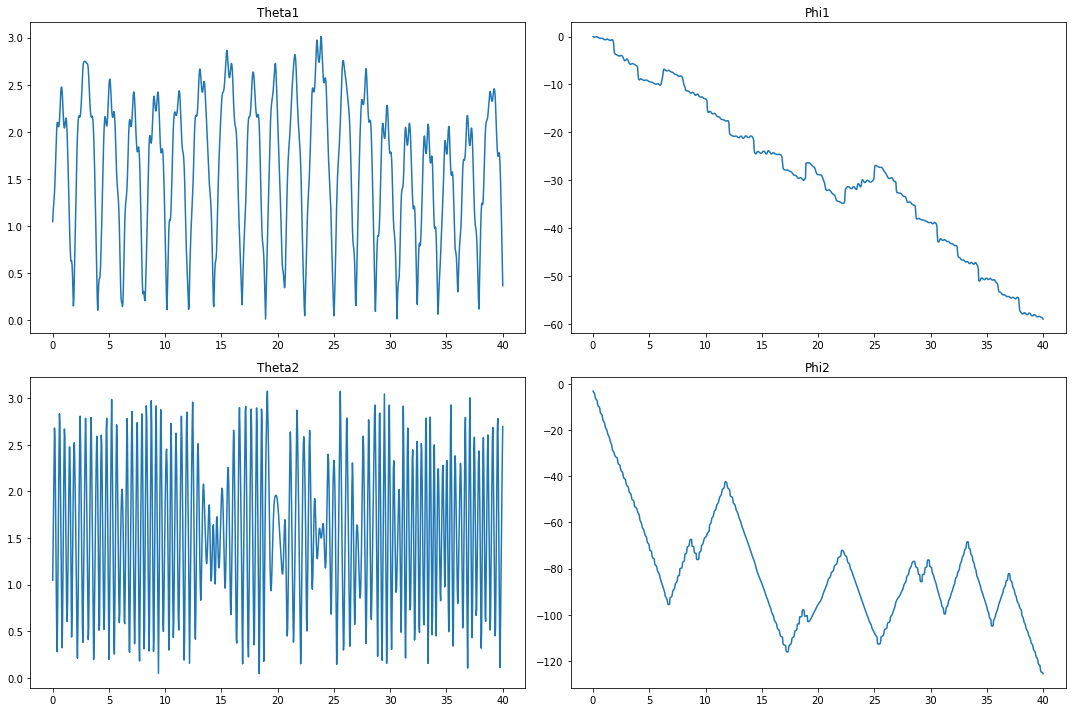

In [51]:

fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0, 0].plot(t,the1)
axs[0, 0].set_title("Theta1")
axs[1, 0].plot(t, the2)
axs[1, 0].set_title("Theta2")
#axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(t,phi1)
axs[0, 1].set_title("Phi1")
axs[1, 1].plot(t,phi2)
axs[1, 1].set_title("Phi2")
fig.tight_layout()

<br> Implementing a function that takes in the angles and return the position or coordinates of the pendulum. 

In [38]:
def get_pos(the1, the2, phi1, phi2, L1, L2):
    return (x1_f(the1, the2, phi1, phi2, L1, L2),
            y1_f(the1, the2, phi1, phi2, L1, L2),
            z1_f(the1, the2, phi1, phi2, L1, L2),
            x2_f(the1, the2, phi1, phi2, L1, L2),
            y2_f(the1, the2, phi1, phi2, L1, L2),
            z2_f(the1, the2, phi1, phi2, L1, L2))

x1, y1, z1, x2, y2, z2 = get_pos(ans.T[0], ans.T[1], ans.T[2], ans.T[3], L1, L2)
#np.save('../data/3Dpen', np.array([x1,y1,z1,x2,y2,z2]))

<br> To animate the 3D pendulum model, one must use the results found and animate it using **VPython**. 